# Doubly Linked Lists

### Do not have indexes!
### Connected via nodes with next and prev pointers
### Random access is not allowed

### Big O
#### Insertion - O(1), Removal - O(1)
#### Searching - O(N), Access - O(N)

In [267]:
import networkx as nx
import matplotlib.pyplot as plt

In [161]:
class Node:
    """Class to create Node of the Singly Linked List """
    def __init__(self, value):
        self.value = value
        self.next = None
        self.prev = None

In [279]:
class DoublyLinkList:
    """Class to create Doubly Linked List"""
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0


    def print_list(self):
        """
        Shows Doubly Linked list elements values
        """
        lst = []
        current = self.head
        while current:
            lst.append(current.value)
            current = current.next
        
        return lst 
        
        
    def nodes_connection(self):
        """
        Shows Doubly Linked list elements values
        """
        
        lst = []
        current = self.head
        while current:
            if not current.prev or not current.next:
                if not current.prev and current.next:
                    lst.append([None, current.value, current.next.value])
                elif not current.next and current.prev:
                    lst.append([current.prev.value, current.value, None])
                elif not current.prev and not current.next:
                    lst.append([None, current.value, None])
            else:   
                lst.append([current.prev.value, current.value, current.next.value])
            current = current.next
        
        return lst      

    
    def graph(self):
        """
        Builds Doubly Linked List graph
        """

        nodes = self.nodes_connection()
        dll_graph = nx.Graph()
        counter = 0
        for node in nodes:
            nodename = str(node[1]) + ' - ' + str(counter)
            dll_graph.add_node(nodename)
#             if node[0]:
#                 dll_graph.add_node(node[0])
#                 dll_graph.add_edge(node[1], node[0])
            if node[2]:
                next_nodename = str(node[2]) + ' - ' + str(counter + 1)
                dll_graph.add_node(next_nodename)
                dll_graph.add_edge(nodename, next_nodename, weight=1)
            counter += 1
        
        print("Nodes of graph: ", dll_graph.nodes())
        nx.draw(dll_graph, with_labels = True)
    
        
    def push(self, value):
        """
        Adds a new node to the end of the
        Doubly Linked list. Takes value of new Node
        as an argument. Returns updated list
        """
        
        # create a new node with the value passed to the fuunction
        new_node = Node(value)
        # if the head property is None set the head and tail
        # to be the newly created node
        if not self.head:
            self.head = new_node
            self.tail = self.head
        # if not 
        else:
            # set the next property on the  tail to be that node
            self.tail.next = new_node
            # set the previous property on the newly created node
            # to be the tail
            new_node.prev = self.tail
            # set the tail to be the newly created node
            self.tail = new_node
        # increment the length
        self.length += 1
        
        return self
    
    
    def pop(self):
        """
        Removes a node from the end of the Doubly Linked List
        Returns popped node
        """
        
        if not self.head:
            return None
        # store the current tail in variable to return later
        popped_node = self.tail
        # if the length is 1, set the head and tail to be None
        if self.length == 1:
            self.head = None
            self. tail = None
        else:
            # update the tail to be the previous node
            self.tail = popped_node.prev
            # set the new tail's next property to null
            self.tail.next = None
            # set prev property of poped node to None
            popped_node.prev = None
        # decrement the length
        self.length -= 1
        
        return popped_node
    
    
    def shift(self):
        """
        Removes a node from the beggining of the Doubly Linked List.
        Returns shifted node
        """
        
        # if the length is 0, return None
        if not self.head:
            return None
        
        # store the current head property in a variable
        old_head = self.head
        #if the length is one
        if self.length == 1:
            # set the head to be None
            self.head = None
            # set the tail to be None
            self.tail = None
        else:
            # update the head to be the next of the old head
            self.head = old_head.next
            # set the head's prev property to None
            self.head.prev = None
            # set the old head's next property to None
            old_head.next = None
        
        # decrement the length
        self.length -= 1
        
        return old_head
        
        
    def unshift(self, value):
        """
        Adds a node to the beggining of the Doubly Linked list.
        Takes node value as argument. Returns updated list
        """
        
        # create a new node with the value passed to the function
        new_node = Node(value)
        if self.length == 0:
            # set the head to be the new node
            self.head = new_node
            # set the tail to be the new node
            self.head = new_node
        else:
            # set the prev property on the head of the list to be
            # the new node
            self.head.prev = new_node
            # set the next property on the new node to be the head
            # property
            new_node.next = self.head
            # update the head
            self.head = new_node
        
        # increment the length
        self.length += 1
        
        return self
    
    
    def get(self, index):
        """
        Accessing a node in a Doubly Linked List by its position
        Returns the node with index
        """
        
        if index < 0  or index >= self.length:
            return None
        
        # if the index is less than or equal to half of the length
        # of the list
        if index <= self.length/2:
            # loop through the list starting from the head and
            # loop towards the middle
            count = 0
            current_node = self.head
            while count != index:
                current_node = current_node.next
                count += 1
        # if the index is greater than half of the list
        else:
            # loop through the list starting from the tail and
            # loop towards the middle
            count = self.length - 1
            current_node = self.tail
            while count != index:
                current_node = current_node.prev
                count -= 1
                
        return current_node
        
        
    def set_value(self, index, value):
        """
        Changing the value of a node based on it's position in the
        Doubly Linked List. Function accepts a value and index 
        as arguments. Returns True or False
        """
        
        # create a variable which is the result of the get method
        # at the index passed to the function
        modified_node = self.get(index)
        # if get method returns valid node
        if modified_node:
            # set the value of that node to be the value passed
            # to the function
            modified_node.value = value
            return True
        return False
    
    
    def insert(self, index, value):
        """
        Adds a node in a Doubly Linked List by a certain position.
        Returns True or False
        """
        
        # if the index is less then zero or greater than
        # the length of the list, return False
        if index < 0 or index > self.length:
            return False
        # if the index is the same as the length, push a new
        # node to the end of the list
        elif index == self.length:
            return bool(self.push(value))
        # if the index is 0, unshift a new node to the start
        # of the list
        elif index == 0:
            return bool(self.unshift(value))
        # otherwise 
        else:
            new_node = Node(value)
            # using get method, access the node at the 'index-1'
            before_node = self.get(index-1)
            # save next property of before node to the variable
            after_node = before_node.next
            # set next property on before node to be the new node
            before_node.next = new_node
            # set prev property on new node to be previous node
            new_node.prev = before_node
            # set the next property on the new node to be after node
            new_node.next = after_node
            # set prev property on after node to be the new node
            after_node.prev = new_node
            # increment the length
            self.length += 1
            return True
        
        
    def remove(self, index):
        """
        Removing a node from the Singly Linked list
        at a specific position. Returns the removed node
        """
        
        # if the index is less then zero or greater or equal to
        # the length of the list, return None
        if index < 0 or index >= self.length:
            return None
        # if the index is the same as the length-1, pop
        # the node from the end of the list
        elif index == self.length - 1:
            return self.pop()
        # if the index is 0, shift a node from the start
        # of the list
        elif index == 0:
            return self.shift()
        # otherwise 
        else:
            # use get method to retreive the node to be removed
            removed_node = self.get(index)
            # save before and after node to a variables
            before_node = removed_node.prev
            after_node = removed_node.next
            # set next property of before node to after node
            before_node.next = after_node
            # set prev property of after node to befor node
            after_node.prev = before_node
            # set next and prev properties on removed node to None
            removed_node.prev = None
            removed_node.next = None            
            # decrement length
            self.length -= 1
            return removed_node
        
        
    def reverse(self):
        """
        Reversing the Doubly Linked List in place. 
        Returns reversed list
        """

        # create variable called current_node and initialize it
        # to the head property
        current_node = self.head
        # swap the head and tail
        self.tail, self.head = self.head, self.tail
        # loop through the list
        while current_node:
            # swap prev and next properties on current node
            current_node.prev, current_node.next = current_node.next, current_node.prev
            # since next property was cahnged to prev next node is prev
            current_node = current_node.prev

        return self

In [280]:
d = DoublyLinkList()

In [281]:
d.push(7)
d.push(8)
d.push(9)
d.push(25)
d.push(12)

In [254]:
s = copy.deepcopy(d)

In [274]:
d.print_list()

[7, 8, 9, 25, 12]

In [275]:
d.nodes_connection()

[[None, 7, 8], [7, 8, 9], [8, 9, 25], [9, 25, 12], [25, 12, None]]

Nodes of graph:  ['7 - 0', '8 - 1', '9 - 2', '25 - 3', '12 - 4']


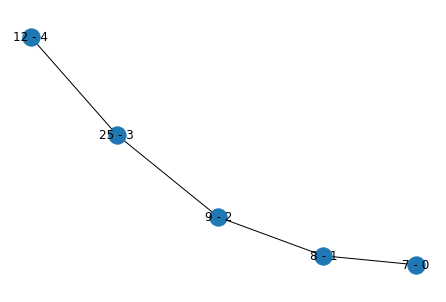

In [282]:
d.graph()

In [277]:
d.unshift(7)

Nodes of graph:  ['7 - 0', '7 - 1', '8 - 2', '9 - 3', '25 - 4', '12 - 5']


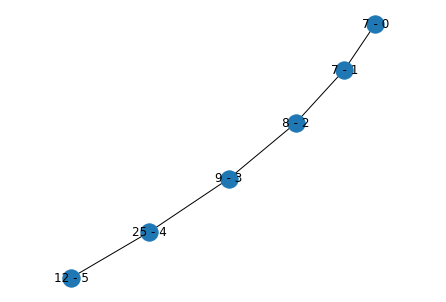

In [278]:
d.graph()

In [268]:
d.unshift(7)

In [269]:
d.print_list()

[7, 7, 8, 9, 74, 25, 12, 90]

Nodes of graph:  [7, 8, 9, 74, 25, 12, 90]


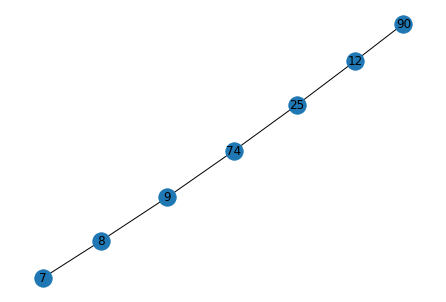

In [270]:
d.graph()